# **TUGAS 1**

## Data Understanding

Merupakan salah satu tahapan penting dalam Knowledge Discovery in database (KDD) atau data maining yang merupakan langkah awal untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut karena nantinya akan memengaruhi keberhasilan seluruh proses data maining

## Pengumpulan data

Dalam tahap ini kami sudah mengumpulkan data dan meletakkan di aiven.io yang merupakan sumber data dari data base yang berbeda dalam tahapan pengumpulan data harus dipastikan bahwa semua data harus relevan sesuai dengan tujuan analisis.

### Install Package untuk MySQL dan PosgreSQL

## Sampling data

Sampling data digunakan untuk memahami subset data tanpa harus memproses seluruh dataset disi.pada tahap ini samplng digunakan dengan mengelompokkan data berdasarkan kelasnya dengan warna yang berbeda yaitu Iris-sentosa berwarna biru Iris-versicolor berwarna merah dan Iris-virginica berwarna hijau hal ini salahsatunya bertujuan untuk memudahkan visuakisasi

## Profiling data

merupakan proses membuat ringkasan tentang setiap variable dalam dataset,termasuk tipe data dan meproses memeriksa, memahami, dan menganalisis struktur serta kualitas data sebelum digunakan dalam analisis lebih lanjut.


### menarik data base dari PosgreSql dan Mysql menjadi 1 tabel sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan

## Visualisasi Data

Visualisasi data dalam analisis dataset digunakan ketika kita ingin memahami, mengeksplorasi, dan menyajikan pola dalam data. visualisasi membantu dalam mendeteksi pola, tren, hubungan antar fitur, serta distribusi data menampilkan visualisasi data dengan diagram membantu dalam mempercepat analisis data.

## Korelasi dan Asosiasi

merupakan proses menghitung koefisien korelasi untuk melihat hubungan linier antar variable yang bertujuan untuk menganalisis hubungan antar variabel dalam dataset.

## Eksplorasi Data

Eksplorasi data adalah proses awal dalam analisis data untuk memahami karakteristik, distribusi, dan pola dalam dataset sehingga menghasilkan deskripsi statistik seperti mean, median, modus,standar deviasi,minimun, dan maskimum dengan menggunakan visualisasi data seperti grafik histogram scatter plot untuk melihat pola atau trend awal

## Indentifikasi Masalah Data

merupakan proses memahami kualitas data dan memastikan bahwa data yang akan kita analisis atau gunakan dalam model machine learning sudah bersih, lengkap, dan sesuai format yang diharapkan. Hal yang perlu diperhatikan adalah:

- Missing Values: Menemukan data yang hilang atau tidak lengkap.
- Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
- Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
- Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

## Validasi data

Validasi data dilakukan untuk memastikan bahwa data yang digunakan bersih, lengkap, dan sesuai sebelum dianalisis atau divisualisasikan dan memastikan apakah data memcerminkan realitas atau fenomena yang ingin dipelajari

In [1]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

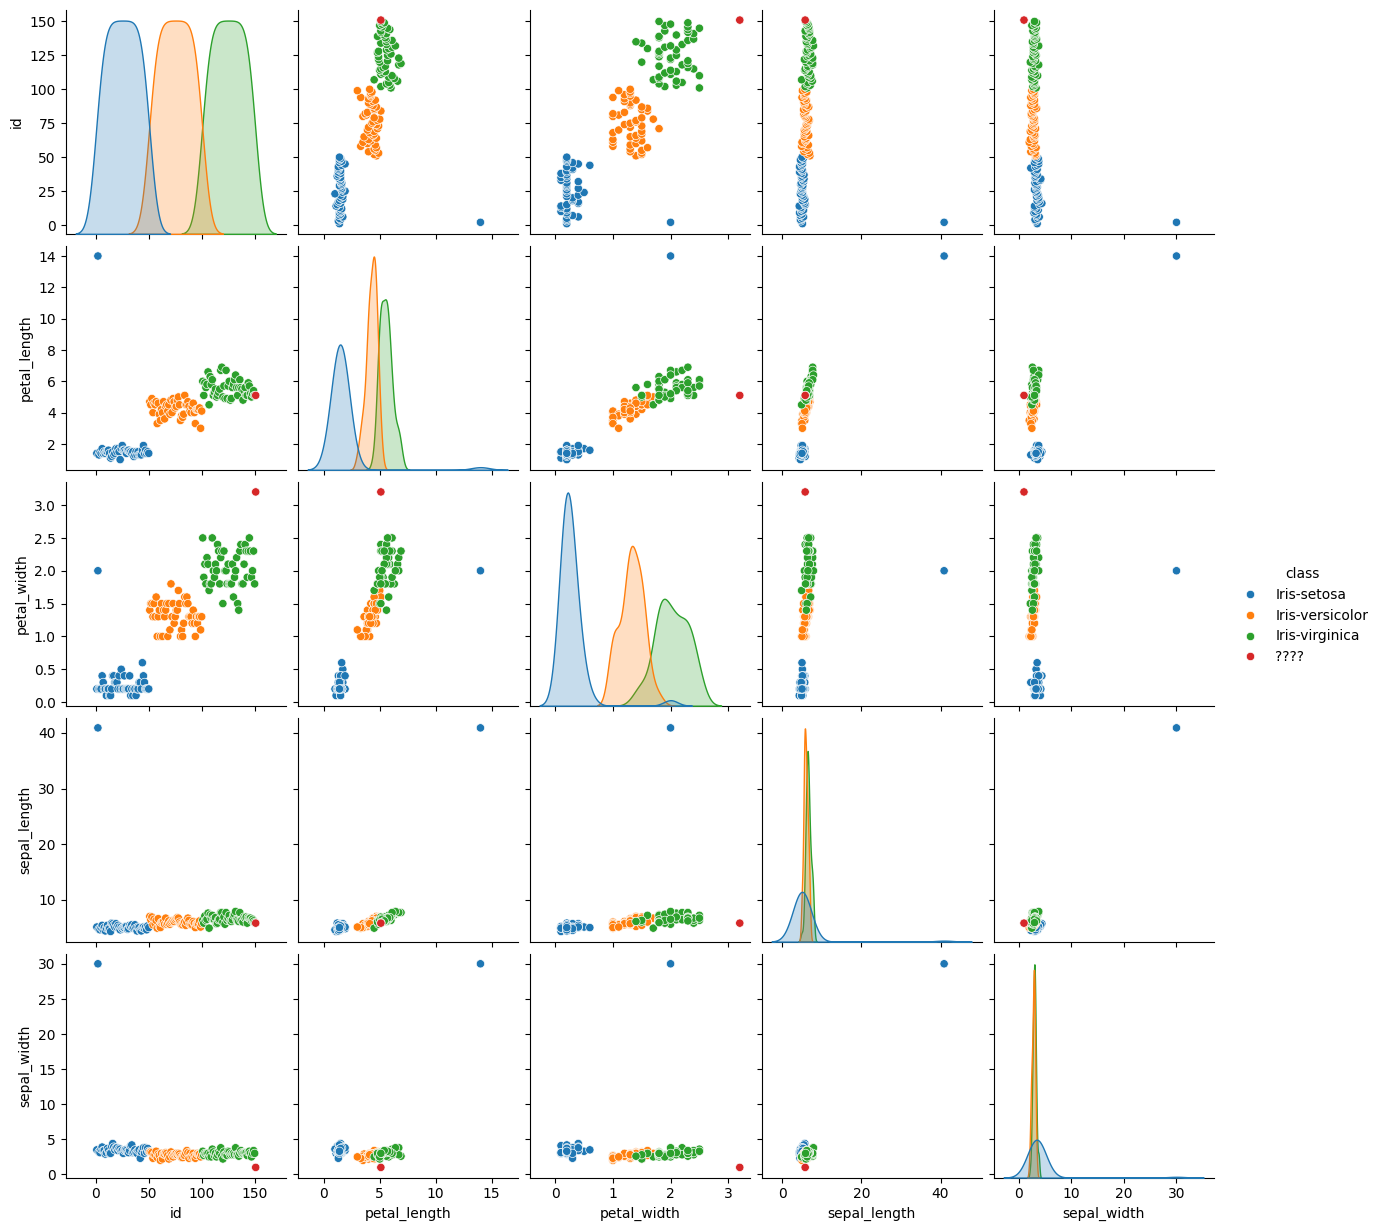

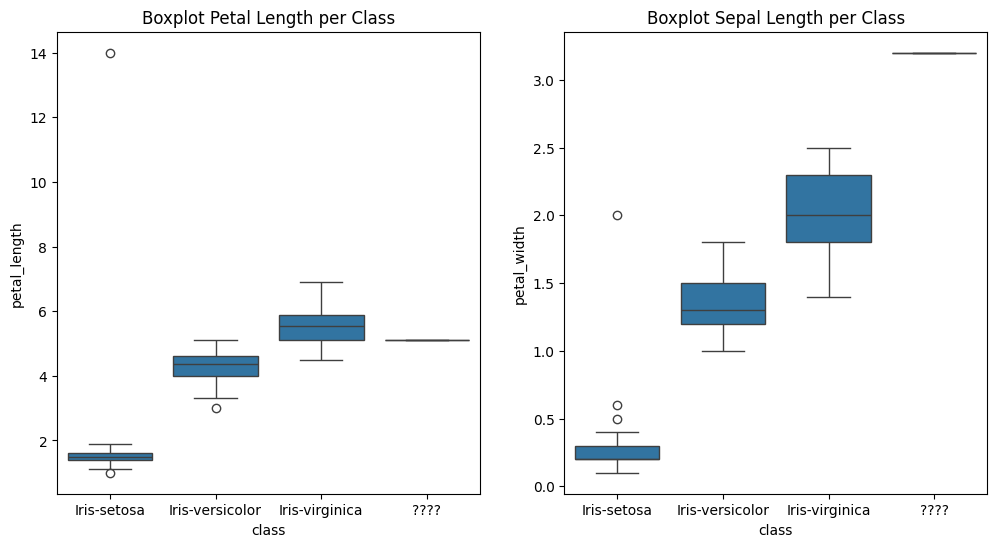

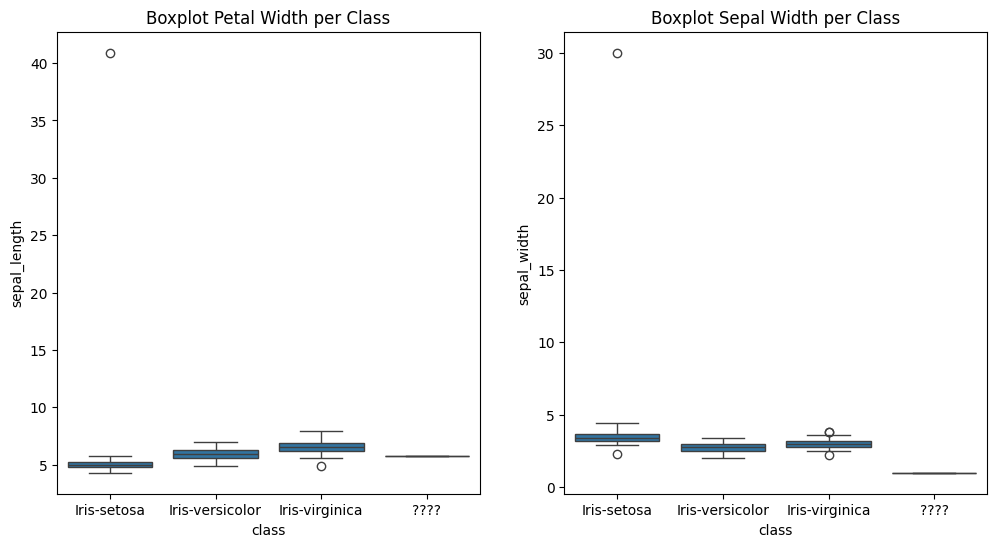

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Visualisasi data
# Scatter plot antar variabel
sns.pairplot(df_merged, hue="class")
plt.show()

# Visualisasi data dengan boxplot per class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
plt.title("Boxplot Petal Length per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
plt.title("Boxplot Sepal Length per Class")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
plt.title("Boxplot Petal Width per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
plt.title("Boxplot Sepal Width per Class")

plt.show()



Kode ini mengambil data dari dua database berbeda, yaitu PostgreSQL dan MySQL, lalu menggabungkannya berdasarkan kolom "id" dan "class". Setelah itu, data hasil gabungan dianalisis dan divisualisasikan menggunakan scatter plot dan boxplot.

# Alur Eksekusi Program:
**1. Mengambil Data dari PostgreSQL**

- Kode ini terkoneksi ke database PostgreSQL dan mengambil semua data dari tabel "bunga".
- Data tersebut kemudian dikonversi menjadi DataFrame Pandas agar lebih mudah diolah.

**2. Mengambil Data dari MySQL**

- Prosesnya mirip dengan PostgreSQL, tetapi menggunakan koneksi MySQL.
- Data dari tabel "flowermysql" disimpan dalam DataFrame Pandas.

**3. Menggabungkan Data**

- Data dari kedua database digabungkan berdasarkan "id" dan "class" menggunakan metode inner join.
- Hanya data yang cocok dalam kedua tabel yang akan disertakan dalam hasil akhir.

**4. Menampilkan Data Gabungan**

- Data hasil gabungan ditampilkan secara keseluruhan tanpa indeks untuk memudahkan pembacaan.

**5. Visualisasi Data**

- Scatter Plot (Pairplot) digunakan untuk melihat hubungan antar variabel dan distribusi kelas.
- Boxplot digunakan untuk melihat distribusi dan kemungkinan outlier dalam beberapa fitur, seperti panjang dan lebar kelopak serta sepal.